         cases
data          
2011-0     320
2011-1     306
2011-2     306
2011-3     398
2011-4     416
2011-5     444
2011-6     515
2011-7     446
2011-8     339
2011-9     378
2011-10    301
2011-11    296
2012-0     326
2012-1     319
2012-2     354
2012-3     419
2012-4     460
2012-5     477
2012-6     475
2012-7     439


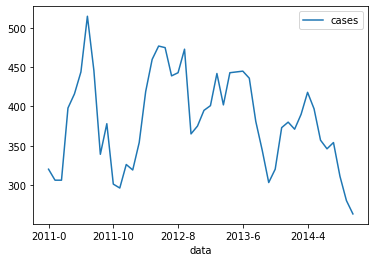

In [3]:

# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('DatasetWithDAte(Sindh).csv', header=0, index_col=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.721005
p-value: 0.070473


ADF Statistic: -2.721005
p-value: 0.070473


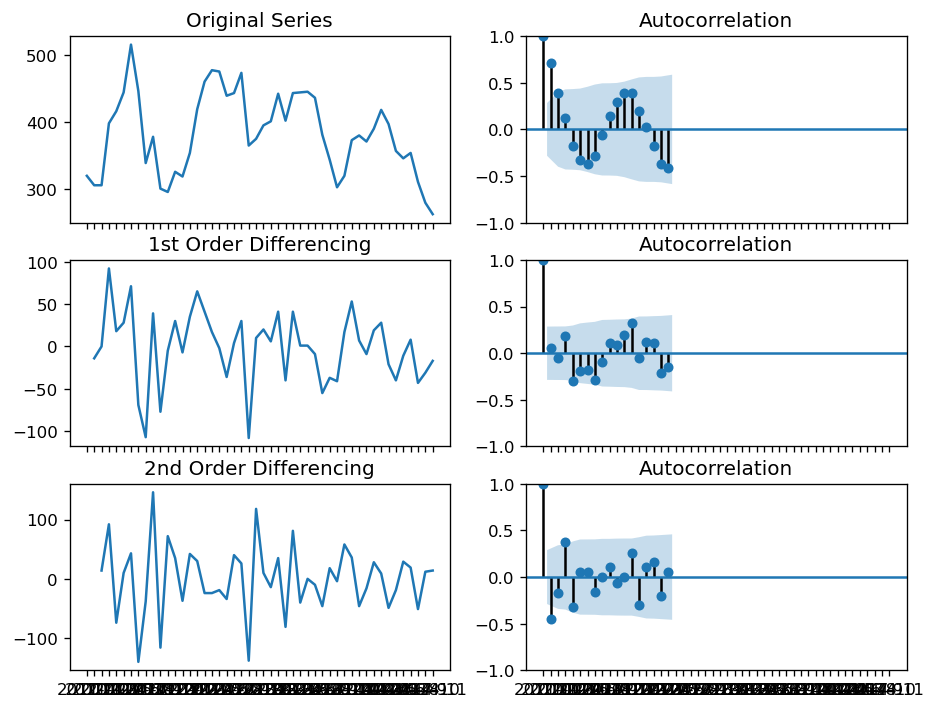

In [5]:

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(series.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(series); axes[0, 0].set_title('Original Series')
plot_acf(series, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(series.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(series.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(series.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(series.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [6]:
from pmdarima.arima.utils import ndiffs
y = series

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

1

c:\users\asad hayyat\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


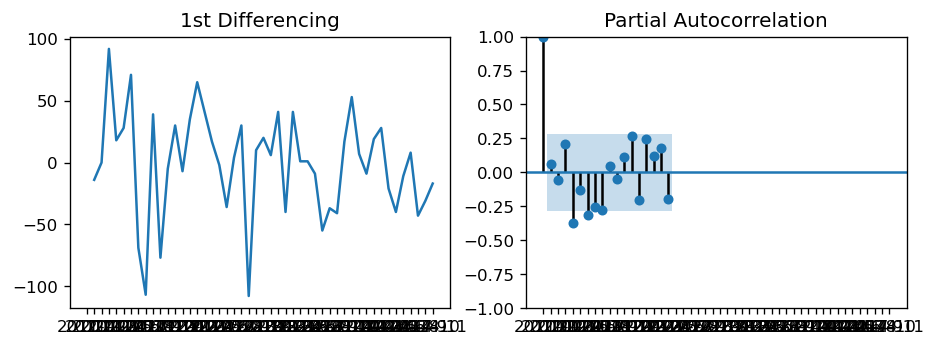

In [7]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(series.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(series.diff().dropna(), ax=axes[1])

plt.show()

#p as taken as 0

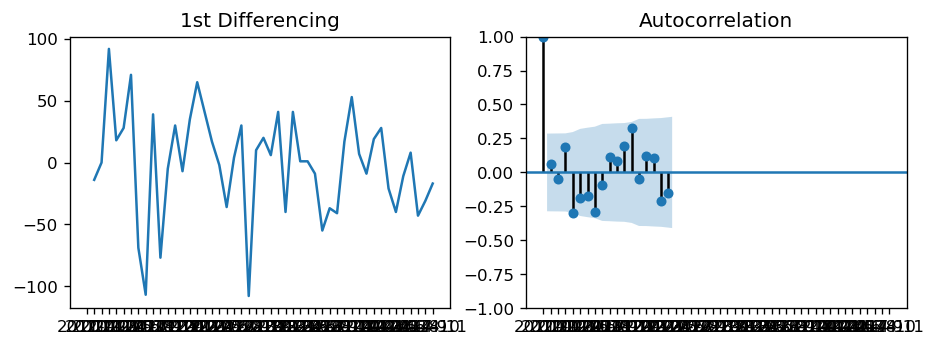

In [8]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(series.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(series.diff().dropna(), ax=axes[1])

plt.show()

#q is 1

In [9]:

#train, test = series[0:split_point], series[split_point:]
#print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
print('Dataset %d, Validation %d' % (len(train), len(test)))

Dataset 31, Validation 17


In [10]:
import pmdarima as pm
import pickle
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=1, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
model_fit.save('model.pkl')
with open('model_pickle','wb') as f:
        pickle.dump(model,f)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=329.926, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=346.539, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=328.450, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=331.409, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=461.965, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=329.719, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=330.716, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.559 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -161.225
Date:                Wed, 01 Jun 2022   AIC                            328.450
Time:                        21:30:17   BIC     

NameError: name 'model_fit' is not defined

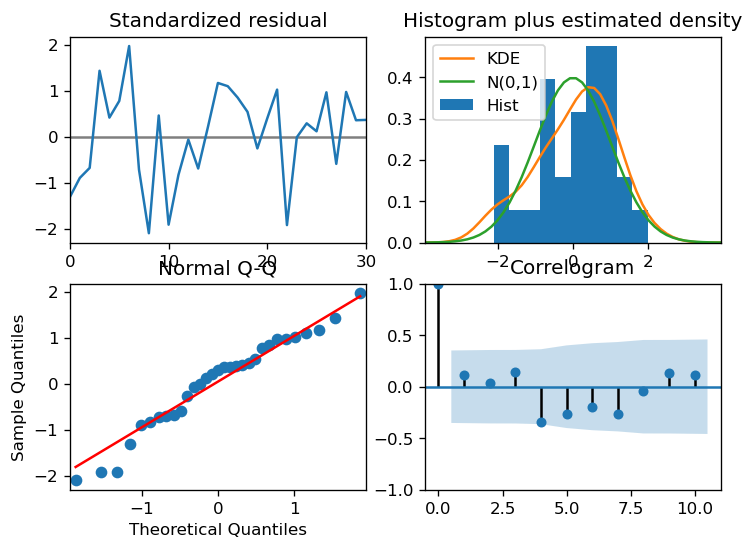

In [11]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

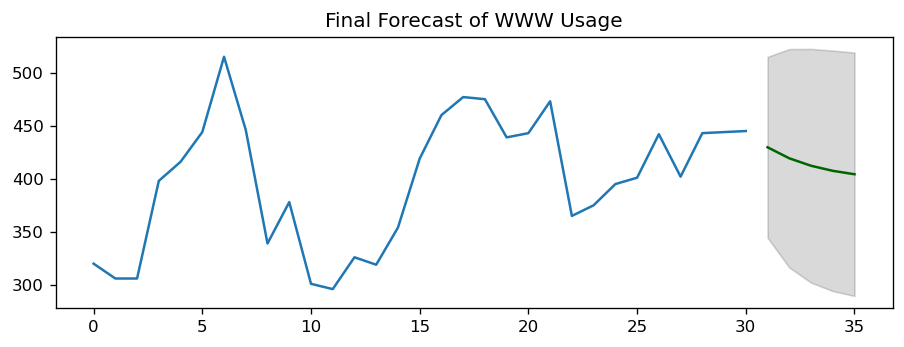

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

#model=ARIMAResults.load('model.pkl')
with open('model_pickle','rb') as f:
    model = pickle.load(f)
n_periods = 5
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#print(fc[0])
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

c:\users\asad hayyat\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\asad hayyat\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=433.940232, expected=436.000000
predicted=427.096491, expected=381.000000
predicted=383.760633, expected=344.000000
predicted=340.382234, expected=303.000000
predicted=320.039761, expected=320.000000
predicted=325.797427, expected=373.000000
predicted=377.005617, expected=380.000000
predicted=377.757160, expected=371.000000
predicted=371.338824, expected=390.000000
predicted=393.138221, expected=418.000000
predicted=420.386508, expected=397.000000
predicted=391.156281, expected=357.000000
predicted=354.693677, expected=346.000000
predicted=345.895440, expected=354.000000
predicted=355.630995, expected=311.000000
predicted=301.464301, expected=280.000000
predicted=282.483398, expected=263.000000
Test RMSE: 27.700


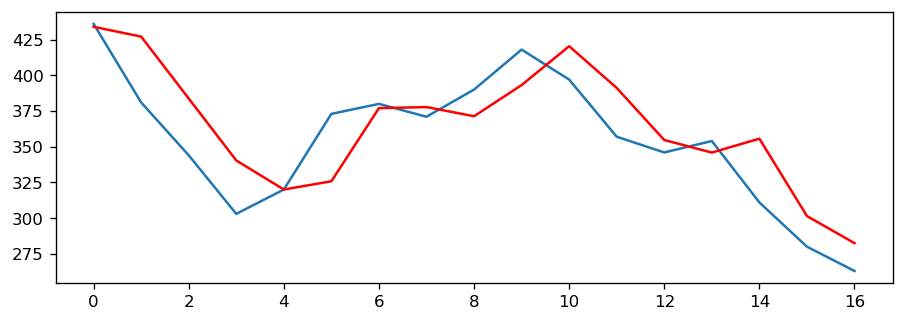

1


ValueError: Length of passed values is 1, index implies 5.

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

n_periods = 5
fc = model_fit.forecast(n_periods=n_periods,return_conf_int=True)
print(len(fc))
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()